# IMT 573 - Problem Set 2 - Exploring Data

### Instructions

Before beginning this assignment, please ensure you have access to a working instance of Jupyter Notebooks with Python 3.

1. First, replace the “YOUR NAME HERE” text in the next cell with your own full name. Any collaborators must also be listed in this cell.

2. Be sure to include well-documented (e.g. commented) code cells, figures, and clearly written text  explanations as necessary. Any figures should be clearly labeled and appropriately referenced within the text. Be sure that each visualization adds value to your written explanation; avoid redundancy – you do no need four different visualizations of the same pattern.

3. Collaboration on problem sets and labs is fun, useful, and encouraged. However, each student must turn in an individual write-up in their own words as well as code/work that is their own. Regardless of whether you work with others, what you turn in must be your own work; this includes code and interpretation of results. The names of all collaborators must be listed on each assignment. Do not copy-and-paste from other students’ responses or code - your code should never be on any other student's screen or machine.

4. All materials and resources that you use (with the exception of lecture slides) must be appropriately referenced within your assignment.

5. Partial credit will be awarded for each question for which a serious attempt at finding an answer has been shown. Students are *strongly* encouraged to attempt each question and document their reasoning process even if they cannot find the correct answer. 

6. After completing the assignment, ensure that your code can run from start to finish without issue. Restart the kernal and run all cells to double check.

Name: Steve Gonzales
Collaborators: None

For this assignment, you'll need (at least) the following packages. If the package does not load, be sure it is properly installed.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In this problem set, we will use data on animals at shelters in the city of [Long Beach, California](https://en.wikipedia.org/wiki/Long_Beach,\_California). The data can be found in the `animal_intakes_and_outcomes.csv` file. You can find more information on this data [here](https://web.archive.org/web/20230929001208/https://data.longbeach.gov/explore/dataset/animal-shelter-intakes-and-outcomes/information/?disjunctive.animal_type&disjunctive.primary_color&disjunctive.sex&disjunctive.intake_cond&disjunctive.intake_type&disjunctive.reason&disjunctive.outcome_type&disjunctive.outcome_subtype&disjunctive.intake_is_dead&disjunctive.outcome_is_dead).

### Problem 1: Inspecting animal shelter data

Load the data and describe in a short paragraph what the data contains and what each variable represents. Perform a basic inspection of the data and discuss what you find.

#### Dataset schema

|Data|Description|Column Name|Type|Sample|
|---|---|---|---|---|
|Animal ID   |Unique identification for each animal   |animal_id   |text   |A002500   |
|Animal Name   |Name of the animal (blank value means name not known). Animals with "\*" are given by shelter staff.    |animal_name   |text   |PENELOPE   |
|Animal Type |Species name of the animal   |animal_type   |text   |DOG   |
|Primary Color |The predominant color of the animal   |primary_color   |text   |WHITE   |
|Secondary Color |Additional coloring, less predominant than the primary color   |secondary_color   |text   |   |
|Sex   |Altered sex of the animal   |sex   |text   |Spayed   |
|DOB  |Date of Birth (if blank, DOB unknown)   |dob   |date   |2008-12-09   |
|Age   |Current age of animal (0 if less than 1 year)   |age   |decimal   |14   |
|Intake Date   |Date on which animal was brought to the shelter    |intake_date   |date   |2017-07-02   |
|Intake Condition   |Condition of animal at intake   |intake_cond   |text   |NORMAL   |
|Intake Type   |The reason for intake such as stray capture, wildlife captures, adopted but returned, owner surrendered etc.   |intake_type   |text   |CONFISCATE   |
|Intake Subtype   |The method or secondary manner in which the animal was admitted to the shelter   |intake_subtype   |text   |POLICE   |
|Reason for Intake   |The reason an owner surrendered their animal   |reason   |text   |   |
|Outcome Date   |Exit or outcome date such as date of adoption or date animal died   |outcome_date   |date   |2017-07-03   |
|Crossing   |Intersection/Cross street of intake or capture   |crossing   |text   |4600 E OCEAN BLVD, LONG BEACH, CA 90803   |
|Jurisdiction   |Geographical jurisdiction of where an animal originated   |jurisdiction   |text   |LONG BEACH   |
|Outcome Type  |Outcome associated with animal - adopted, died, euthanized etc.    |outcome_type   |text   |RETURN TO OWNER   |
|Outcome Subtype   |Secondary manner in which the animal left the shelter, usually used to identify which program, group, or other data useful in measuring program efficiency   |outcome_subtype   |text   |FRE RID HM   |
|intake_is_dead   |No description available for this field   |intake_is_dead   |text   |Alive on intake   |
|outcome_is_dead   |No description available for this field  |outcome_is_dead   |text   |FALSE   |
|was_outcome_alive   |No description available for this field   |was_outcome_alive   |integer   |1   |

In [2]:
df = pd.read_csv('animal-shelter-intakes-and-outcomes.csv')
display(df)

,Animal ID,Animal Name,Animal Type,Primary Color,Secondary Color,Sex,DOB,Age,Intake Date,Intake Condition,...,Intake Subtype,Reason for Intake,Outcome Date,Crossing,Jurisdiction,Outcome Type,Outcome Subtype,intake_is_dead,outcome_is_dead,was_outcome_alive
0,A002500,PENELOPE,DOG,WHITE,NaN,Spayed,2008-12-09,14.0,2017-07-02,NORMAL,...,POLICE,NaN,2017-07-03,"4600 E OCEAN BLVD, LONG BEACH, CA 90803",LONG BEACH,RETURN TO OWNER,FRE RID HM,Alive on Intake,False,1
1,A226033,SNOOPY,DOG,WHITE,NaN,Neutered,2002-02-23,21.0,2017-10-08,NORMAL,...,OTC,NaN,2017-10-08,"13200 BLK ACORO PL, CERRITOS, CA 90703",CERRITOS,RETURN TO OWNER,FRE RID HM,Alive on Intake,False,1
2,A234250,NINA,DOG,BR BRINDLE,NaN,Spayed,2008-08-01,15.0,2018-06-01,ILL SEVERE,...,CRUELTY,NaN,2018-06-07,"1900 W BURNETT ST, LONG BEACH, CA 90810",LONG BEACH,EUTHANASIA,ILL SEVERE,Alive on Intake,True,0
3,A238953,CECE,DOG,BUFF,NaN,Female,2013-07-17,10.0,2017-01-03,NORMAL,...,FIELD,NaN,2017-01-03,"400 E HULLET ST, LONG BEACH, CA 90805",LONG BEACH,RETURN TO OWNER,FRE RID HM,Alive on Intake,False,1
4,A242600,BARBY,DOG,BLACK,NaN,Spayed,2007-10-27,15.0,2020-11-18,NORMAL,...,OTC,NaN,2020-11-19,"2000 BLK W COWLES ST, LONG BEACH, CA 90813",LONG BEACH,RESCUE,LIVELOVE,Alive on Intake,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39881,A707543,GEORGIE (PUP4),DOG,TAN,NaN,Male,2023-08-10,0.0,2023-09-24,UNDER AGE/WEIGHT,...,OTC,NaN,NaN,NaN,LONG BEACH,NaN,NaN,Alive on Intake,False,1
39882,A707556,*VENTI,CAT,GRAY TABBY,NaN,Male,2023-07-31,0.0,2023-09-24,UNDER AGE/WEIGHT,...,OTC,NaN,NaN,900 BLK E SPRING STREET SIGNAL HILL CA 90755,SIGNAL HILL,NaN,NaN,Alive on Intake,False,1
39883,A707578,*SNOW,CAT,WHITE,NaN,Female,2023-08-13,0.0,2023-09-24,UNDER AGE/WEIGHT,...,OTC,NaN,NaN,100 BLK MIRA MAR AVE LONG BEACH CA 90803,LONG BEACH,NaN,NaN,Alive on Intake,False,1
39884,A707580,*OREO,CAT,BLACK,WHITE,Male,2023-08-24,0.0,2023-09-24,UNDER AGE/WEIGHT,...,OTC,NaN,NaN,"600 BLOCK PIER D, LONG BEACH CA",LONG BEACH,NaN,NaN,Alive on Intake,False,1


In [3]:
display(df.describe())
df['intake_date'] = pd.to_datetime(df['Intake Date'], errors='coerce')
df['outcome_date'] = pd.to_datetime(df['Outcome Date'], errors='coerce')
print(f"{df['intake_date'].min()=}, {df['intake_date'].max()=}")
print(f"{df['outcome_date'].min()=}, {df['outcome_date'].max()=}")

,Age,was_outcome_alive
count,34863.000000,39886.000000
mean,5.408714,0.791004
std,3.882323,0.406596
min,-7.000000,0.000000
25%,3.000000,1.000000
50%,5.000000,1.000000
75%,7.000000,1.000000
max,55.000000,1.000000


df['intake_date'].min()=Timestamp('2017-01-01 00:00:00'), df['intake_date'].max()=Timestamp('2023-09-27 00:00:00')
df['outcome_date'].min()=Timestamp('2017-01-01 00:00:00'), df['outcome_date'].max()=Timestamp('2023-09-27 00:00:00')


In [4]:
# Look at NaN cells; possibly bad data
for col in df.columns:
    na_rows = df[col].isna().sum()
    print(f'`{col}` has {na_rows} NaN rows. {100*(na_rows/len(df[col])):.2f}%')

`Animal ID` has 0 NaN rows. 0.00%
`Animal Name` has 17125 NaN rows. 42.93%
`Animal Type` has 0 NaN rows. 0.00%
`Primary Color` has 0 NaN rows. 0.00%
`Secondary Color` has 20871 NaN rows. 52.33%
`Sex` has 0 NaN rows. 0.00%
`DOB` has 5023 NaN rows. 12.59%
`Age` has 5023 NaN rows. 12.59%
`Intake Date` has 0 NaN rows. 0.00%
`Intake Condition` has 0 NaN rows. 0.00%
`Intake Type` has 0 NaN rows. 0.00%
`Intake Subtype` has 473 NaN rows. 1.19%
`Reason for Intake` has 37121 NaN rows. 93.07%
`Outcome Date` has 601 NaN rows. 1.51%
`Crossing` has 119 NaN rows. 0.30%
`Jurisdiction` has 1 NaN rows. 0.00%
`Outcome Type` has 604 NaN rows. 1.51%
`Outcome Subtype` has 4841 NaN rows. 12.14%
`intake_is_dead` has 0 NaN rows. 0.00%
`outcome_is_dead` has 0 NaN rows. 0.00%
`was_outcome_alive` has 0 NaN rows. 0.00%
`intake_date` has 0 NaN rows. 0.00%
`outcome_date` has 601 NaN rows. 1.51%


This data is about animals taken into a shelter, the type of animal and the outcome of the animal.<p>
The data looks mostly good except for some data that does not look to be populated: `Reason for Intake`.<p>
`Animal Name` is only populated about 57% of the time.<p>
`Age` data definitely has some bad data as the minimum is `-7`<p>
The Intake and Outcome dates, although stored as strings, seem to be valid.<p>

### Problem 2: Formulating questions

Formulate two motivating questions based on the animal shelter data that you want to explore. Describe why these questions are interesting and how you might go about answering them.

Question 1: Is there a particular species or breed that is brought to the shelter. We might use this data to reach out to breed clubs for adoption or to possibly reduce incident of intake. Count of animals by species and breed by month or year.<p>
<p>
Question 2: Is there a particular location (zip code) where more animals are mistreated? We might use this data to reach out to the community to understand root cause and see if we could reduce incidents of cruelty. Count of animals by Zip Code by month or year. 

### Problem 3: Exploring data

For each of the questions you proposed in Problem 2, perform an exploratory data analysis designed to address the question. At a minimum, you should produce two visualizations related to each question. Be sure to describe what the visuals show and how they speak to your question of interest.

#### Question 1
Is there a particular species or breed that is brought to the shelter?

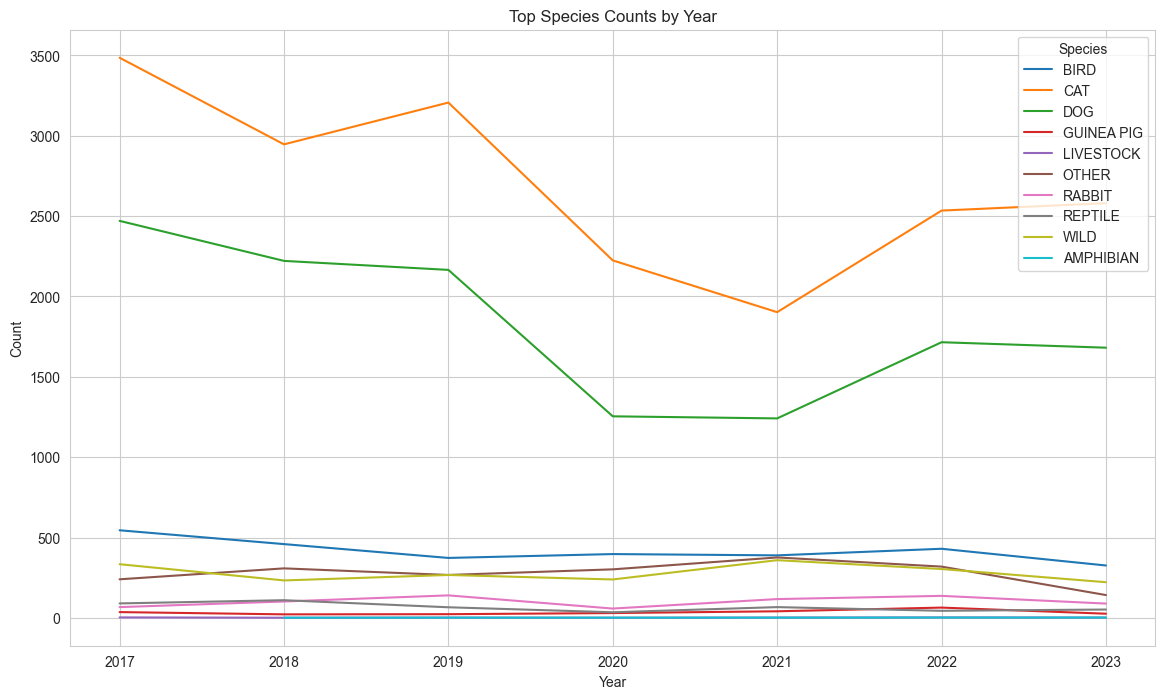

This is the macro view to look at Species brought in. 
No surprise the top two are cat and dog, but we have more cats, so let's drill into that data.


In [5]:
sns.set_style('whitegrid')

# Ensure relevant columns are datetime and clean up NaNs
df['intake_date'] = pd.to_datetime(df['Intake Date'], errors='coerce')
df['Year'] = df['intake_date'].dt.year
df['Month'] = df['intake_date'].dt.month

# Filter out rows with missing or incomplete data
df_cleaned = df.dropna(subset=['Animal Type', 'intake_date'])

# Group data by Species, and Year
species_counts = (df_cleaned.groupby(['Year', 'Animal Type']).size().reset_index(name='Count'))

# Visualization: Top species counts over time
top_species = (
    species_counts.groupby('Animal Type')['Count']
    .sum()
    .sort_values(ascending=False)
    .head(10)  # Adjust for top species
    .index
)
# Filter out non-top 10
filtered_data = species_counts[species_counts['Animal Type'].isin(top_species)]
# Plot it
plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_data, x='Year', y='Count', hue='Animal Type', style=None, markers=True)
plt.title('Top Species Counts by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Species')
plt.grid(True)
plt.show()
print("""This is the macro view to look at Species brought in. 
No surprise the top two are cat and dog, but we have more cats, so let's drill into that data.""")

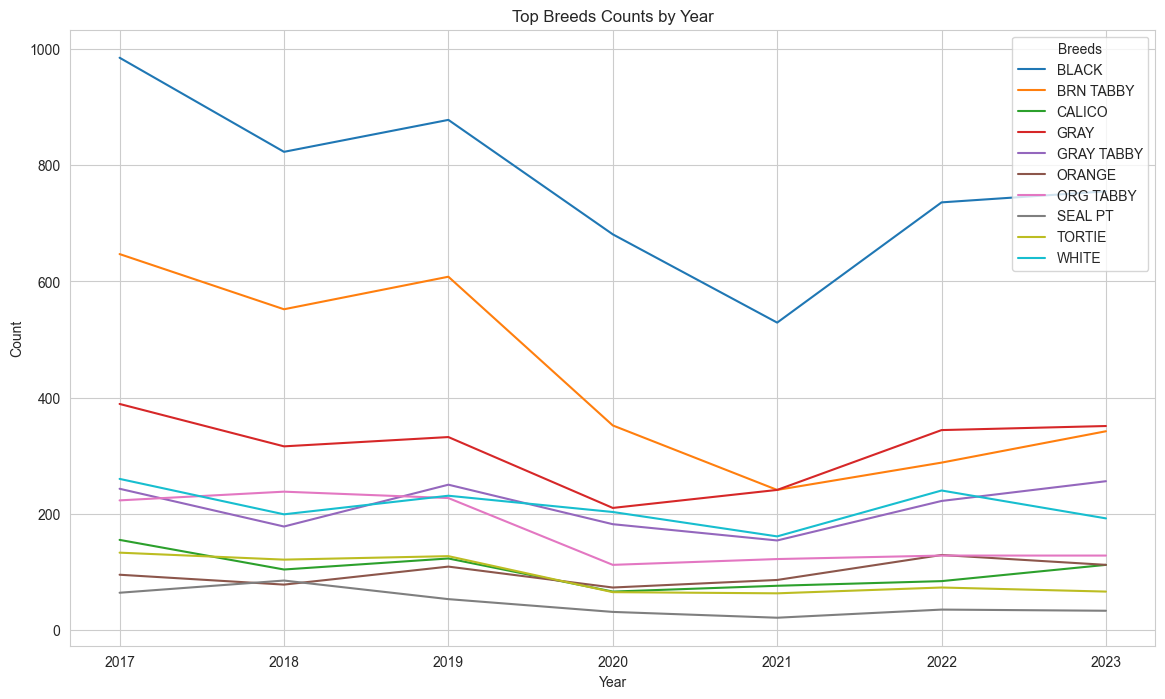

Unfortunately this shows many more black cats. For some reason, in America, there is a perception that black cats are bad luck and therefore they are returned or harmed at higher rates than other types of cats. Next, let's drill into the month.


In [6]:
breed_counts = (df_cleaned[df['Animal Type'] == 'CAT'].groupby(['Year', 'Primary Color']).size().reset_index(name='Count'))
top_breeds = (breed_counts.groupby('Primary Color')['Count'].sum().sort_values(ascending=False).head(10).index)
# Filter out non-top 10
filtered_data = breed_counts[breed_counts['Primary Color'].isin(top_breeds)]
# Plot it
plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_data, x='Year', y='Count', hue='Primary Color', style=None, markers=True)
plt.title('Top Breeds Counts by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Breeds')
plt.grid(True)
plt.show()
print("""Unfortunately this shows many more black cats. For some reason, in America, there is a perception that black cats are bad luck and therefore they are returned or harmed at higher rates than other types of cats. Next, let's drill into the month.""")

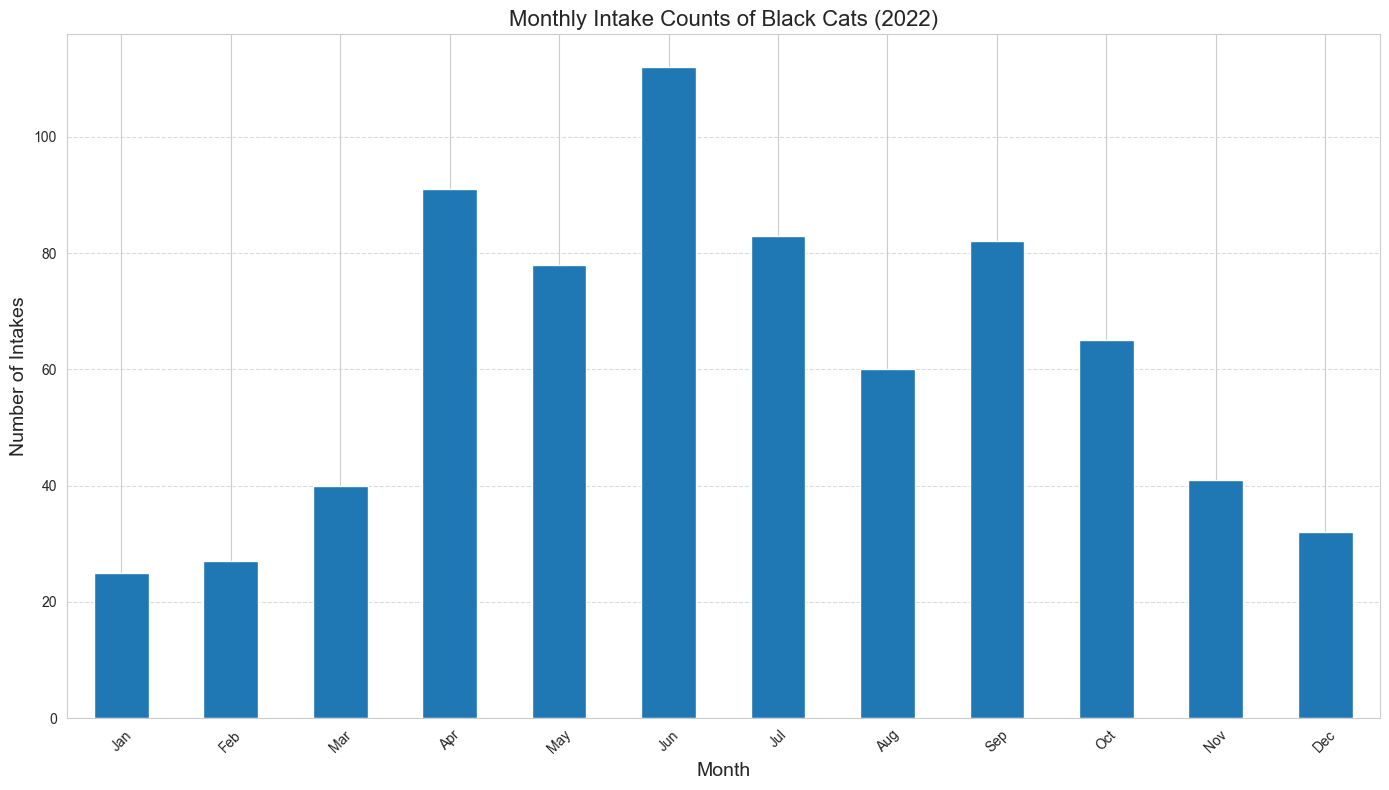

There have been studies done that show the higher incident of fatalities with black cats is around Haloween, Oct 31, but the data does not show that.
It does show that the two highest months are Apr and Jun and those should be the months that we focus educational efforts on.


In [7]:
# Focus the visualization on just black cats in 2022
# Extract month from 'Intake Date'
df_cleaned['Month'] = df_cleaned['intake_date'].dt.month
filtered_df = df_cleaned[
    (df_cleaned['Animal Type'] == 'CAT') & 
    (df_cleaned['Primary Color'] == 'BLACK') &
    (df_cleaned['Year'] == 2022)
]
# Filter data for cats and group by month and primary color
monthly_counts = filtered_df.groupby(['Month']).size()
# Plot stacked bar chart
monthly_counts.plot(kind='bar', figsize=(14, 8), colormap='tab20')

# Add labels and title
plt.title('Monthly Intake Counts of Black Cats (2022)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Intakes', fontsize=14)
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("""There have been studies done that show the higher incident of fatalities with black cats is around Haloween, Oct 31, but the data does not show that.
It does show that the two highest months are Apr and Jun and those should be the months that we focus educational efforts on.""")

#### Question 2
Is there a particular location (zip code) where more animals are mistreated? 

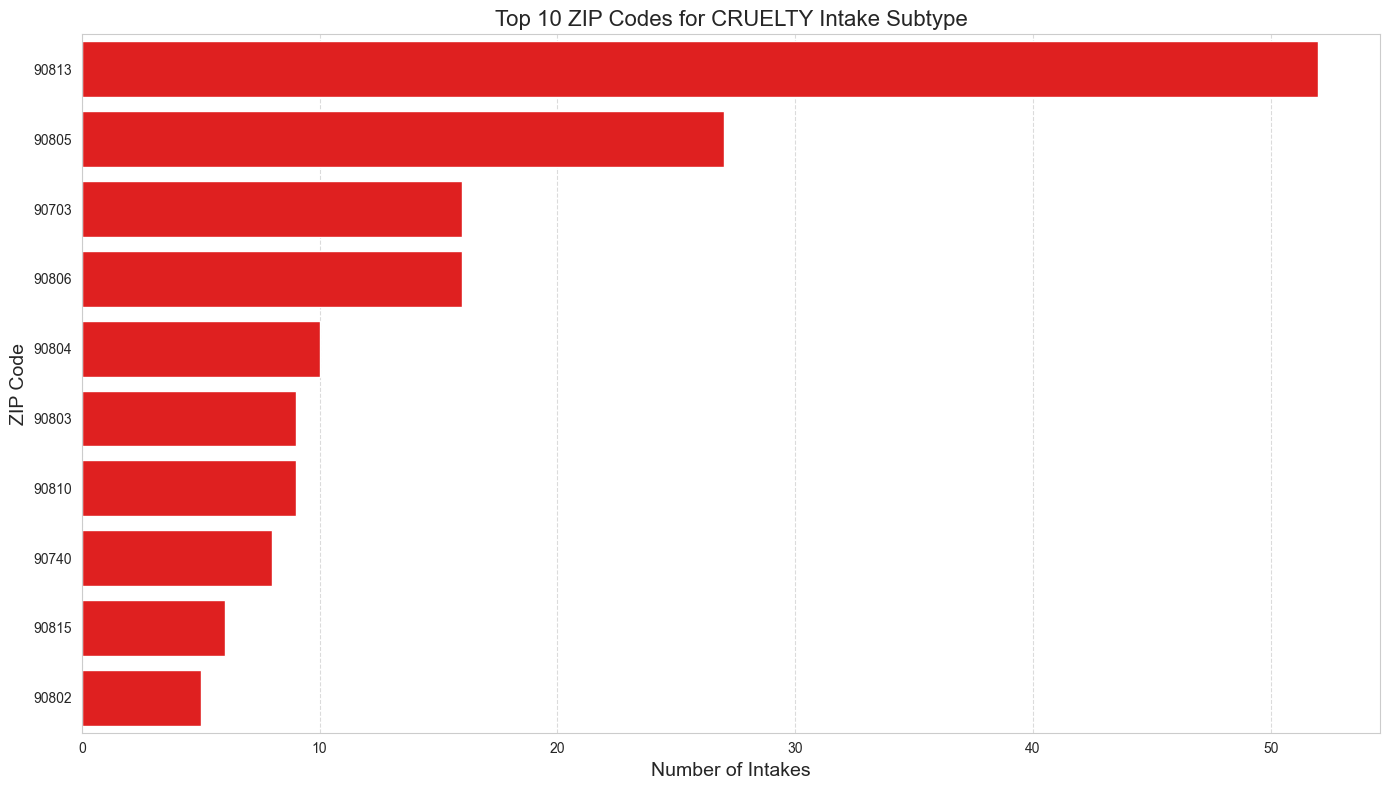

It looks like there are two zip codes that account for the largest numbers of cruelty intakes.
We should focus educational efforts in these areas; coordinating with local authorities


In [8]:
# Filter by location and Intake Subtype
# Extract month from 'Intake Date'
df_cleaned['Year'] = df_cleaned['intake_date'].dt.year
df_cleaned['zip_code'] = df_cleaned['Crossing'].str.extract(r'(\d{5})$', expand=False)
filtered_df = df_cleaned[(df_cleaned['Intake Subtype'] == 'CRUELTY')]

zip_counts = (
    filtered_df.groupby('zip_code')
    .size()
    .reset_index(name='Count')
    .sort_values(by='Count', ascending=False)
)

# Filter for top 10 zip codes
top_zips = zip_counts.head(10)

# Plot using Seaborn
plt.figure(figsize=(14, 8))
sns.barplot(data=top_zips, x='Count', y='zip_code', color='red')

# Add titles and labels
plt.title('Top 10 ZIP Codes for CRUELTY Intake Subtype', fontsize=16)
plt.xlabel('Number of Intakes', fontsize=14)
plt.ylabel('ZIP Code', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
print("""It looks like there are two zip codes that account for the largest numbers of cruelty intakes.
We should focus educational efforts in these areas; coordinating with local authorities""")

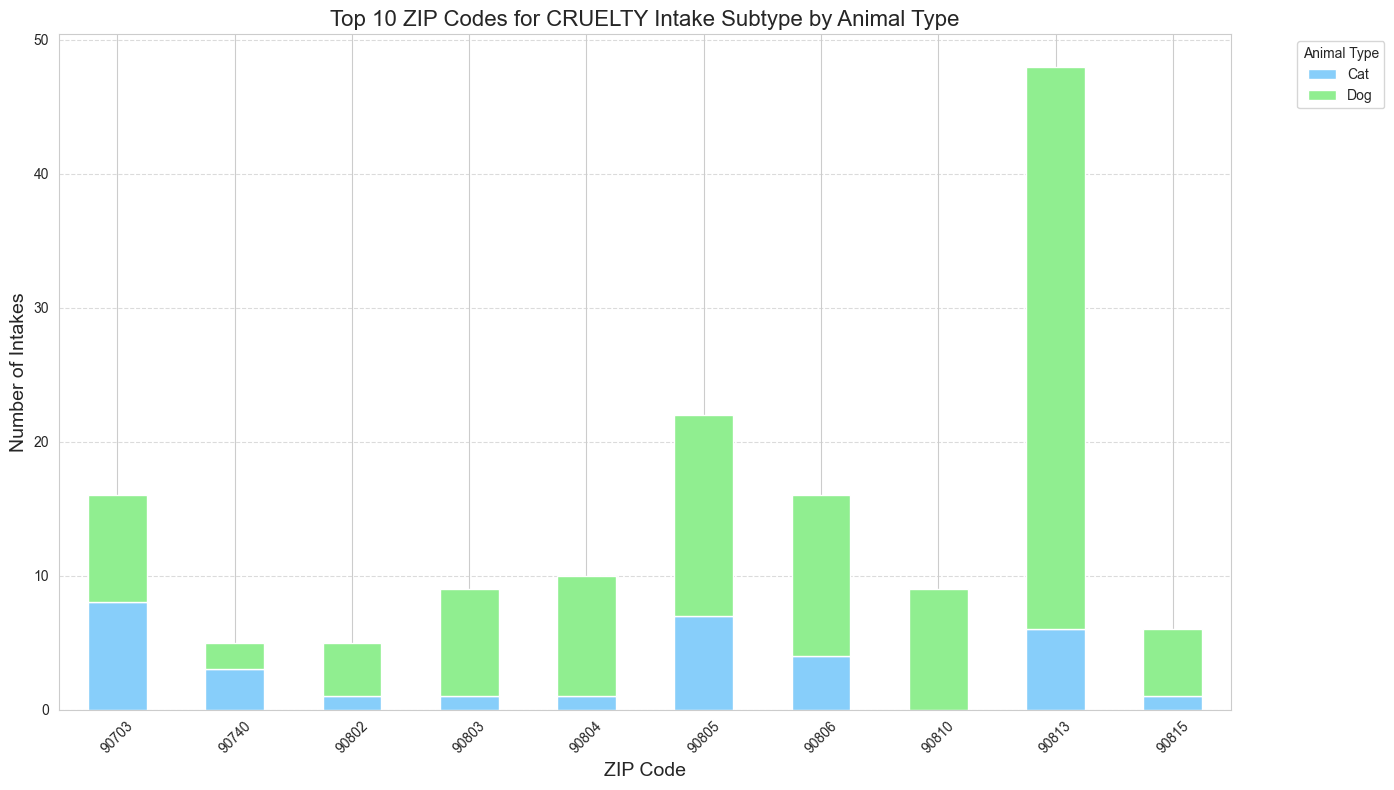

This tells us that we should focus effort specifically to dogs in Zip 90813 and spread education about cats across all the zip codes.


In [9]:
# Filter for 'CRUELTY' Intake Subtype
filtered_df = df_cleaned[
    (df_cleaned['Animal Type'].isin(['CAT', 'DOG'])) & 
    (df_cleaned['Intake Subtype'] == 'CRUELTY')
]

# Group by zip_code and Animal Type, then count occurrences
zip_animal_counts = (
    filtered_df.groupby(['zip_code', 'Animal Type'])
    .size()
    .reset_index(name='Count')
)

# Filter for top 10 zip codes by total intake count
top_zips = zip_counts.sort_values(by='Count', ascending=False).head(10)['zip_code']

# Filter data for top 10 zip codes
filtered_top_zips = zip_animal_counts[zip_animal_counts['zip_code'].isin(top_zips)]

# Pivot data for stacked bar chart (Animal Type counts by zip code)
pivot_data = filtered_top_zips.pivot_table(index='zip_code', columns='Animal Type', values='Count', aggfunc='sum', fill_value=0)
# Plot stacked bar chart with specific colors for Cat and Dog
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 8), color=['lightskyblue', 'lightgreen'])

# Add titles and labels
plt.title('Top 10 ZIP Codes for CRUELTY Intake Subtype by Animal Type', fontsize=16)
plt.xlabel('ZIP Code', fontsize=14)
plt.ylabel('Number of Intakes', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Animal Type', labels=['Cat', 'Dog'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
print("""This tells us that we should focus effort specifically to dogs in Zip 90813 and spread education about cats across all the zip codes.""")

### Problem 4: Challenge your results

After completing the exploratory analyses from Problem 3, do you have any concerns about your findings? How well defined was your original question? Do you still believe this question can be answered using this dataset? Comment on any ethical and/or privacy concerns you have with your analysis.

#### Question 1
Question 1: Is there a particular species or breed that is brought to the shelter. We might use this data to reach out to breed clubs for adoption or to possibly reduce incident of intake. Count of animals by species and breed by month or year.<p>
  - The month of intake might not be the proper time to focus education efforts. Of course, we would discuss this with Shelter stakeholders to understand what and when efforts in the past have been more effective.
 - I believe the data showed clearly an answer to my original question.
 - I do not have any ethical or privacy concerns with the analysis on this question.

#### Question 2
Question 2: Is there a particular location (zip code) where more animals are mistreated? We might use this data to reach out to the community to understand root cause and see if we could reduce incidents of cruelty. Count of animals by Zip Code by month or year. 
 - Looking at data across all years might not be the best choice, but if we are just addressing this for the first time, it might be the best metric.
 - I beleive this data showed an answer to my question clearly.
 - This analysis does bring up a lot of ethical concerns as it will highlight a particular geography and likely also a demographic group. We must be careful in publishing this data, maybe switch to high medium and low, or a measure that does not show a great difference between zip codes.